This notebook is used to visualize the circuit. 
Please run the run.sh first and save the result in the "../results/" directory.

In [5]:
import torch

import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from NeurFlow import Framework
from utils import visualize_chain_of_concepts

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

directory = "../results/"
model_name = "resnet50"
label = 309
tau = 16
path = directory+ f"store_{model_name}_label{label}_tau{tau}.pth"

store = torch.load(path, map_location="cpu", weights_only=False)
FW = store["FW"]
layers = store["layers"]
del store

print(layers)


cuda
['fc', 'layer4.2', 'layer4.1', 'layer4.0', 'layer3.5', 'layer3.4', 'layer3.3', 'layer3.2', 'layer3.1', 'layer3.0', 'layer2.3']


First we cluster the concept vectors of each feature map. 
The print-out has the structure: {neuron_id: {semantic_group_id: concept_id}}

In [ ]:
cluster_layer = 9       # the layer to cluster    
num_cluster = 3         # the number of clusters
num_top_vecs = 5        # number of representative vectors to show
dict_labels, _ = FW.cluster_concept_vectors(cluster_layer, num_cluster, num_top_vecs=num_top_vecs, max_n_clusters=100)
print(dict_labels)

{800: {}, 1185: {3: 0}, 898: {}, 1824: {1: 1, 3: 1, 4: 1}, 1797: {0: 1}, 1319: {}, 617: {1: 1}, 974: {0: 0}, 911: {}, 432: {0: 0}, 1361: {0: 2}, 881: {0: 2, 1: 2}, 884: {0: 2}, 1332: {0: 2}, 599: {}, 895: {0: 0, 2: 0}}


We visualize the concept using concept_id (vis_label).

Feature map: 1824
Label: 1


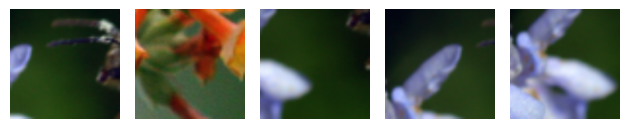

Feature map: 1824
Label: 3


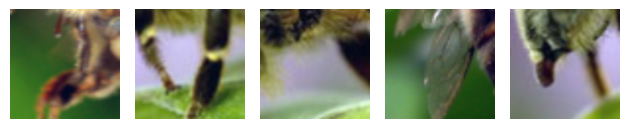

Feature map: 1824
Label: 4


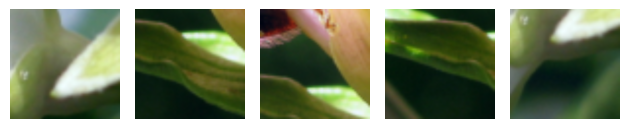

Feature map: 1797
Label: 0


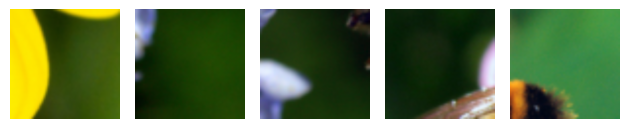

Feature map: 617
Label: 1


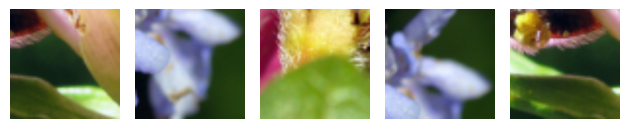

{1824: 4, 1797: 0, 617: 1}

In [7]:
vis_label = 1           # the cluster to visualize
num_vis = 5             # the number of examples to visualize
FW.visualize_cluster_concept_vectors(cluster_layer, vis_label, dict_labels, num_vis, num_top_images=5)

We can visualize all concepts.
Each concept has "num_vis" showed examples.

0
Feature map: 1185
Label: 3


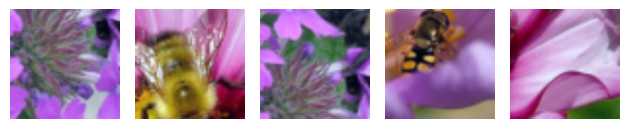

Feature map: 974
Label: 0


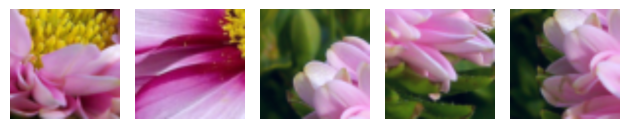

Feature map: 432
Label: 0


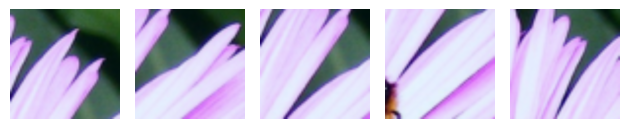

Feature map: 895
Label: 0


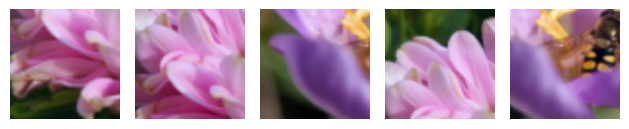

Feature map: 895
Label: 2


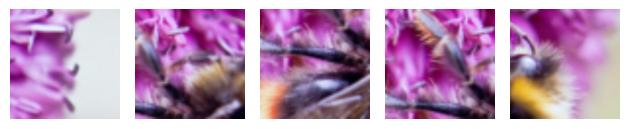

1
Feature map: 1824
Label: 1


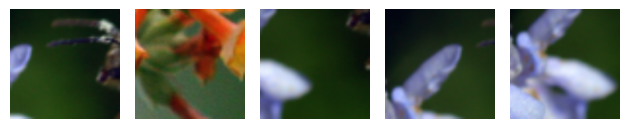

Feature map: 1824
Label: 3


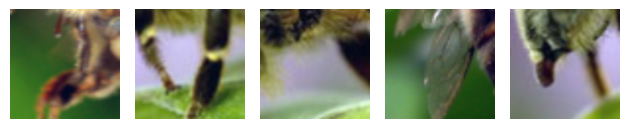

Feature map: 1824
Label: 4


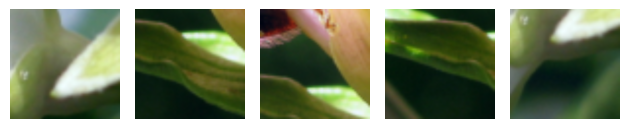

Feature map: 1797
Label: 0


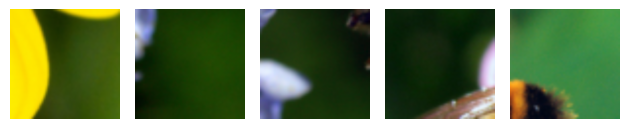

Feature map: 617
Label: 1


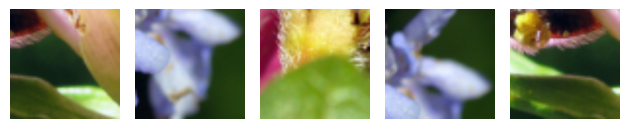

2
Feature map: 1361
Label: 0


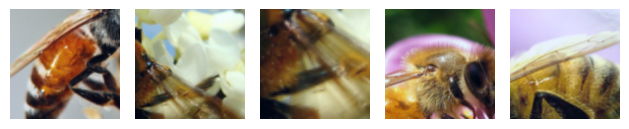

Feature map: 881
Label: 0


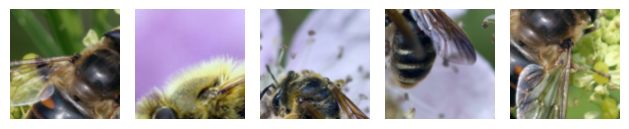

Feature map: 881
Label: 1


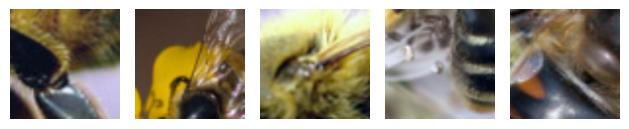

Feature map: 884
Label: 0


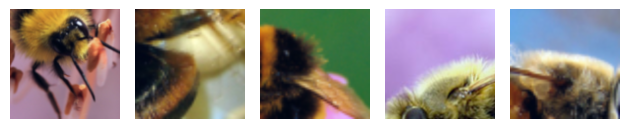

Feature map: 1332
Label: 0


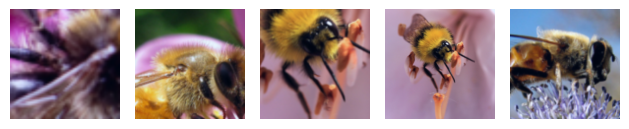

In [ ]:
# visualize all cluster 
vis_labels = [i for i in range(num_cluster)]
num_vis = 5             # number of examples to visualize
for vis_label in vis_labels:
    print(vis_label)
    FW.visualize_cluster_concept_vectors(cluster_layer, vis_label, dict_labels, num_vis, num_top_images=5)

We can trace back what concepts at lower layer have strong impacts on the concept of upper layer.
The dictionary have the structure: {lower_layer_concept_id: score}.

Feature map: 1185
Label: 3


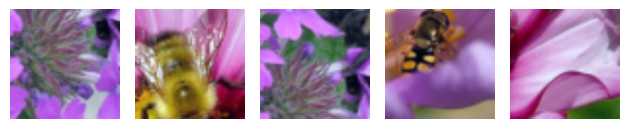

=========layer:8===========
Top concepts of 0 are: {0: 2.149894973683877}
------Layer: 8 cluster_label: 0 ------
Feature map: 974
Label: 0


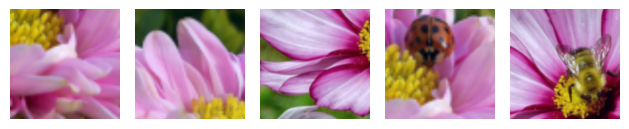

=========layer:7===========
Top concepts of 0 are: {6: 0.007711121841037332}
------Layer: 7 cluster_label: 6 ------
Feature map: 425
Label: 0


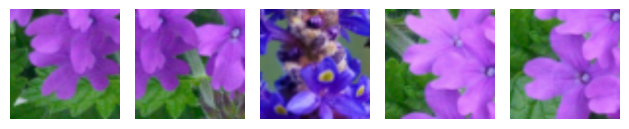

In [6]:
list_num_cluster = [10, 5, 3]   # number of cluster per layer
concept_id = 0                  # id of concept to visualize
end = 9                         # layer of the concept 
start = 7                       # trace back to start layer
num_top_concepts= 1             # number of top concepts at previous layer
num_top_vecs = 10               # number of representation vectors for each concept
specify_cluster = True          # whether to specify the number of cluster - if false then this function will self-determine

visualize_chain_of_concepts(
    FW, 
    concept_id, 
    start, 
    end, 
    num_top_concepts, 
    list_num_cluster,
    specify_cluster,
    num_top_vecs = num_top_vecs,
)

Here, we can visualize what are the critical neurons of a target neuron.

Target neuron: 425
Label: 0


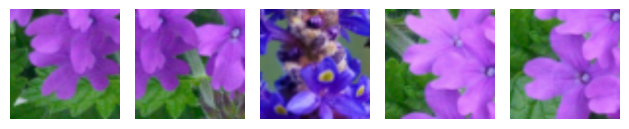

List critical neuron: {np.int64(0): {838: 0.07309399525219339, 897: 0.005735753182980563, 162: 0.008382517362574641, 924: 0.003123912613570396, 437: 0.0033574863503259772, 358: 0.0030255608761537494, 999: -0.002207515963432074, 664: 0.0021107957623199155, 509: 0.0035495414994220157, 74: 0.002105613134982617, 202: 0.002521289858420313, 73: 0.0017815243581782636, 93: 0.00230093448601622, 596: 0.0014585592989911065, 168: 0.001368689388492398, 806: 0.0009312418372682339}, np.int64(1): {838: 0.13460137462800348, 897: 0.002577495947640168, 162: 0.0005861637117699423, 924: 0.002276114093858139, 437: 0.0017031950979111464, 358: 0.0017351332683327436, 999: -0.0021238242986691266, 664: 0.0019691943371093878, 509: 0.0007595212809573627, 74: 0.0017583280355037, 202: 0.0013571356106142453, 73: 0.0016516325054653277, 93: 0.001120450574539194, 596: 0.0016356030570324304, 168: 0.0016286436614390708, 806: 0.0019085441564238737}}
Critical neuron: 838
Score: 0.07309399525219339
Label: 0


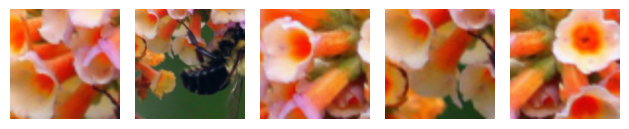

Label: 1


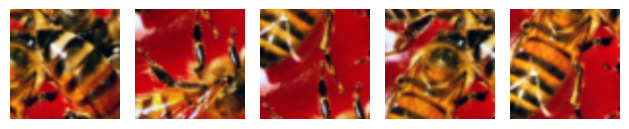

Label: 2


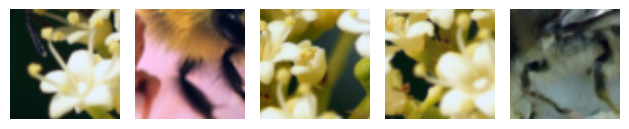

Label: 3


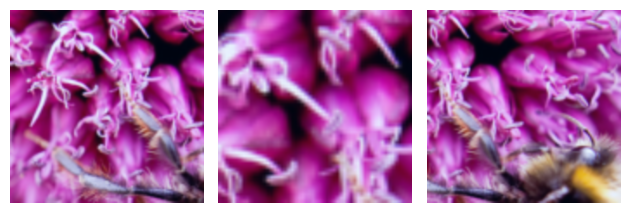

Label: 4


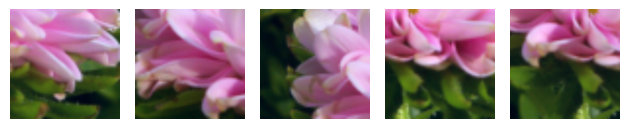

Critical neuron: 897
Score: 0.005735753182980563
Label: 0


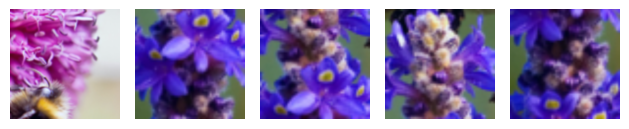

Label: 1


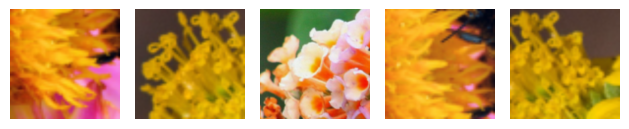

Label: 2


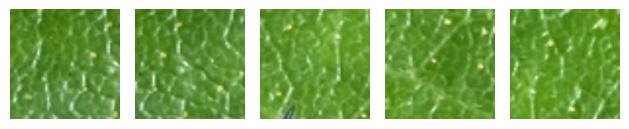

Label: 3


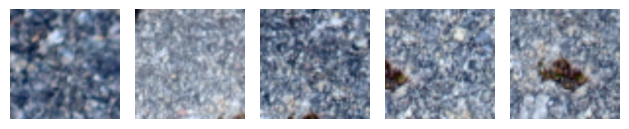

Label: 4


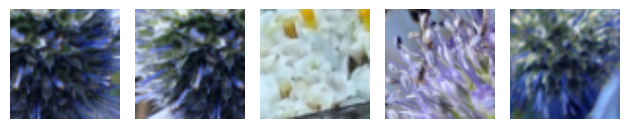

Critical neuron: 162
Score: 0.008382517362574641
Label: 0


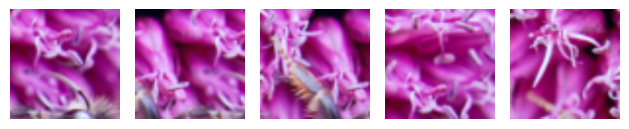

Label: 1


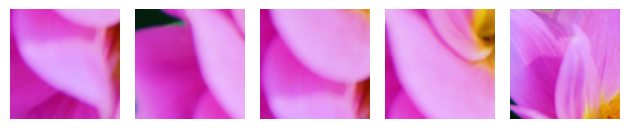

Label: 2


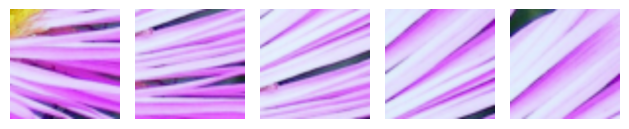

In [7]:
'''
For a specific neuron, we can find the critical neurons that contribute to the activation of the target neuron.
'''

fm = 425
layer = 7
label = 0
num_show = 5
print("==================")
print("Target neuron:", fm)
print("==================")
crit_fms = FW.get_critical_neurons(layer, fm)
FW.visualize_top_images(layer, fm, num_top_imgs=num_show, label = label)

print("==================")
print("List critical neuron:", crit_fms)
print("==================")
count = 0
score_dict = crit_fms[label]
for cfm, score in score_dict.items():
    if count == 3:
        break
    count += 1
    print("===============")
    print("Critical neuron:", cfm)
    print("Score:", score)
    print("===============")
    FW.visualize_top_images(layer-1, cfm, num_top_imgs=num_show)